In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
import tensorflow as tf

physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)


Using TensorFlow backend.


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
X = np.load('data/X.npy')
y = np.load('data/y.npy')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
X_train = X_train.reshape(-1, 60, 44, 1)
X_test = X_test.reshape(-1, 60, 44, 1)
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [5]:
sample_shape = X_train[0].shape
img_width, img_height = sample_shape[0], sample_shape[1]
input_shape = (img_width, img_height, 1)

In [6]:
KERNEL_SIZE = (5, 5)
POOL_SIZE = (2, 2)

In [7]:
# test-only, not to be used in practice
model = Sequential()

model.add(Conv2D(64, KERNEL_SIZE, input_shape=input_shape,
                 activation='relu', use_bias=False, strides=1, padding='same'))

model.add(Conv2D(64, KERNEL_SIZE, activation='relu',
                 strides=1, use_bias=False, padding='same'))

model.add(MaxPooling2D(pool_size=POOL_SIZE, strides=2))

model.add(Conv2D(128, KERNEL_SIZE, activation='relu',
                 strides=1, use_bias=False, padding='same'))

model.add(Conv2D(128, KERNEL_SIZE, activation='relu',
                 strides=1, use_bias=False, padding='same'))

model.add(MaxPooling2D(pool_size=POOL_SIZE, strides=2))

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [8]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=[tf.keras.metrics.BinaryAccuracy()])

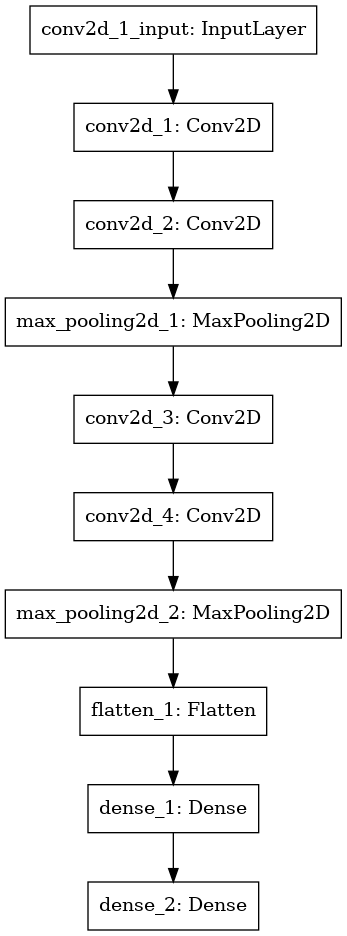

In [11]:
from keras.utils import plot_model

plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [9]:
(y==1).sum(), (y==0).sum() / 100

(227, 1697.02)

In [10]:
class_weight = {0: (y==1).sum(),
                1: (y==0).sum() / 1.1 }


In [11]:
model.fit(X_train, y_train, epochs=10, batch_size=256, verbose=1, validation_split=0.1, class_weight=class_weight)

Train on 107055 samples, validate on 11895 samples
Epoch 1/10
107055/107055 [==============================] - 43s 400us/step - loss: 2506.8615 - binary_accuracy: 0.5208 - val_loss: 354.8586 - val_binary_accuracy: 0.4239
Epoch 2/10
107055/107055 [==============================] - 37s 349us/step - loss: 299.2370 - binary_accuracy: 0.5429 - val_loss: 355.9503 - val_binary_accuracy: 0.6173
Epoch 3/10
107055/107055 [==============================] - 37s 346us/step - loss: 297.6766 - binary_accuracy: 0.6917 - val_loss: 353.4416 - val_binary_accuracy: 0.7465
Epoch 4/10
107055/107055 [==============================] - 38s 357us/step - loss: 352.5272 - binary_accuracy: 0.7766 - val_loss: 355.3988 - val_binary_accuracy: 0.8047
Epoch 5/10
107055/107055 [==============================] - 39s 362us/step - loss: 301.2008 - binary_accuracy: 0.8258 - val_loss: 355.5874 - val_binary_accuracy: 0.8431
Epoch 6/10
107055/107055 [==============================] - 39s 362us/step - loss: 304.0852 - binary_ac

In [16]:
model.evaluate(X_test, y_test)

50979/50979 [==============================] - 9s 185us/step


[0.7305535106635646, 0.8004205822944641]

In [17]:
1 - y_test.sum() / len(y_test)

0.9987641970223033

In [18]:
pred = model.predict(X_test)

In [20]:
pred

array([[0.519878  ],
       [0.49055332],
       [0.5040194 ],
       ...,
       [0.51829255],
       [0.5305628 ],
       [0.4945074 ]], dtype=float32)

In [24]:
(pred > 0.5).sum()

28752